In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

# Load table

In [2]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [3]:
os.getenv('ENDPOINT_URL') 
tbl_file = 's3://llc/Tables/LLC_modis_noise.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/LLC_modis_noise.parquet


# Cloud cutting

<AxesSubplot:>

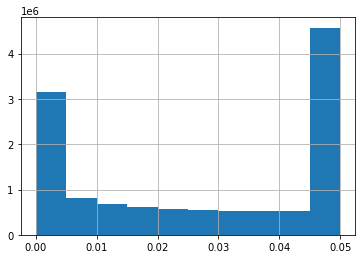

In [4]:
modis_tbl.clear_fraction.hist()

# Cut

In [5]:
clear = modis_tbl.clear_fraction < 0.005
cloudy = modis_tbl.clear_fraction > 0.045

In [6]:
modis_tbl['Clouds'] = 'in between'

In [7]:
modis_tbl.loc[clear, 'Clouds'] = 'clear'

In [8]:
modis_tbl.loc[cloudy, 'Clouds'] = 'cloudy'

## Histogram

In [9]:
clear_tbl = modis_tbl[ modis_tbl.Clouds == 'clear' ]

In [10]:
cloud_tbl = modis_tbl[ modis_tbl.Clouds == 'cloudy' ]

In [11]:
inbet_tbl = modis_tbl[ modis_tbl.Clouds == 'in between' ]

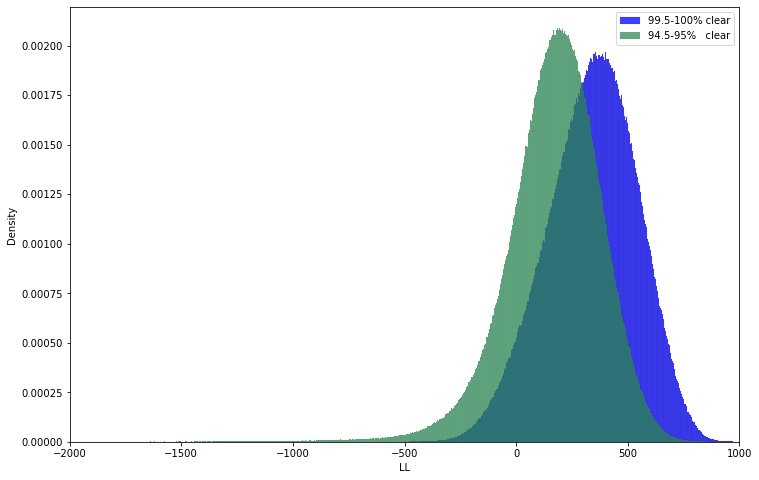

In [14]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
_ = sns.histplot(clear_tbl, x='LL', ax=ax, stat = 'density', label ='99.5-100% clear', color = 'b')
_ = sns.histplot(cloud_tbl, x='LL', ax=ax, stat = 'density', label ='94.5-95%   clear', color = 'seagreen')
#_ = sns.histplot(inbet_tbl, x='LL', ax=ax, stat = 'density', label ='in between', color = 'c')
ax.set_xlim(-2000., 1000.)
ax.legend()

## MOD (clear) vs LLC (all cutouts)

In [11]:
df = pd.DataFrame()

In [12]:
clear_tbl = modis12_tbl[modis12_tbl.Clouds == 'clear']
cloudy_tbl = modis12_tbl[modis12_tbl.Clouds == 'cloudy']

(-2000.0, 1000.0)

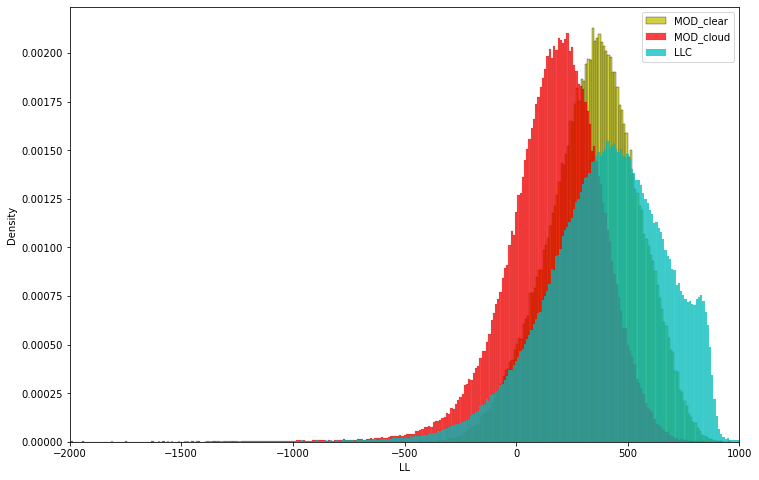

In [13]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
_ = sns.histplot(clear_tbl, x='LL', label='MOD_clear', ax=ax, stat = 'density' , color='y', binwidth = 10 )
_ = sns.histplot(cloudy_tbl, x='LL', label='MOD_cloud', ax=ax, stat = 'density' , color='r', binwidth = 10 )
_ = sns.histplot(llc_table, x='LL', label='LLC', ax=ax, stat = 'density', color='c', binwidth = 10 )
ax.legend()
ax.set_xlim(-2000., 1000.)

## Where is it clear? 

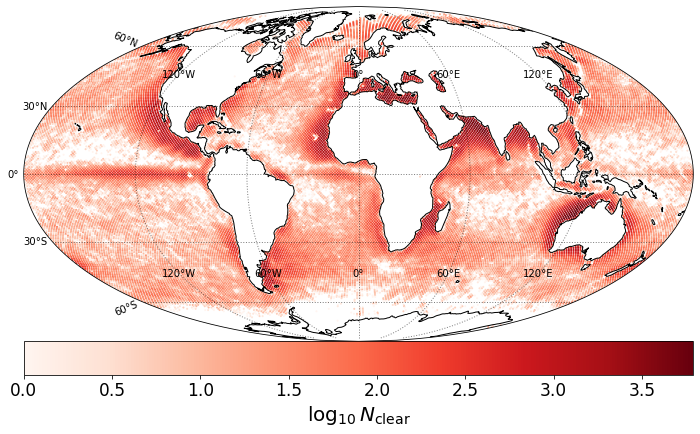

In [26]:
_ = ulmo_figs.show_spatial(clear_tbl, lbl = 'clear')

In [88]:
small_DT = clear_tbl[ (clear_tbl.T90 - clear_tbl.T10) < 0.8 ]

In [89]:
lst = np.random.choice( np.arange(0, high_LL.shape[0], 1) , 5)

In [90]:
lst

array([ 883216, 1157603,  297950,  695828, 1817148])

IndexError: single positional indexer is out-of-bounds

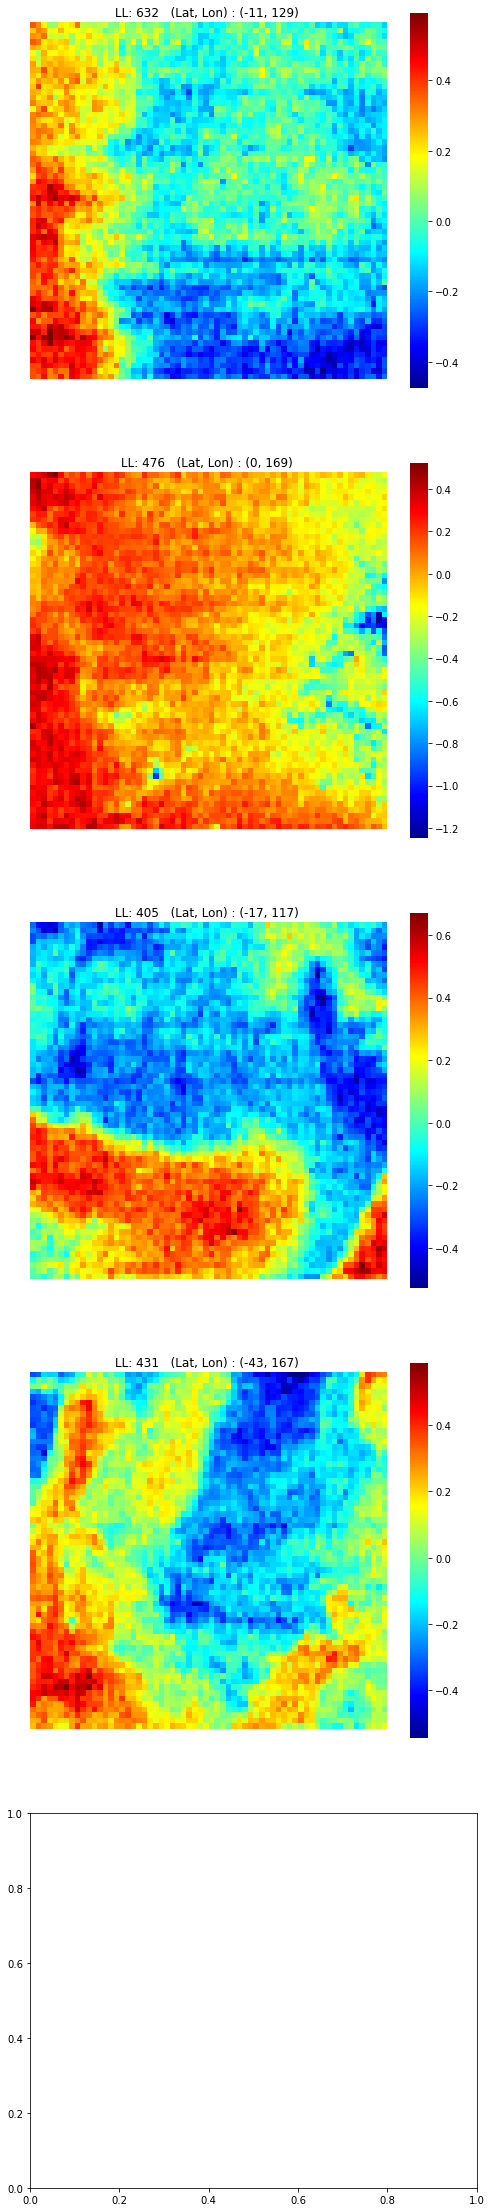

In [91]:
_, cm = ulmo_plotting.load_palette()

fig, axes = plt.subplots(5, figsize = (8, 40))

for row in range(5):
        
    ax = axes[row]

    cutout = small_DT.iloc[lst[row]]

    img = image_utils.grab_image(cutout)  
    lat = round(cutout.lat)
    lon = round(cutout.lon)
    LL  = round(cutout.LL)
        
    ax = sns.heatmap(np.flipud(img), xticklabels=[], yticklabels=[], cmap=cm, cbar=True, square = True, ax = ax)
    ax.set_title('LL: {}   (Lat, Lon) : ({}, {}) '.format(LL, lat, lon))
plt.show()